# <center> **MACHINE LEARNING POUR LA MODELISATION DU RISQUE DE CREDIT DANS R (CREDIT SCORING)**

Par [Josué AFOUDA](https://afouda-datascience.com/)

[Suivre le cours](https://afouda-datascience.com/cours/machine-learning-pour-la-modelisation-du-risque-de-credit-credit-scoring-dans-r/)

# <font color=green> Compréhension de la problématique business

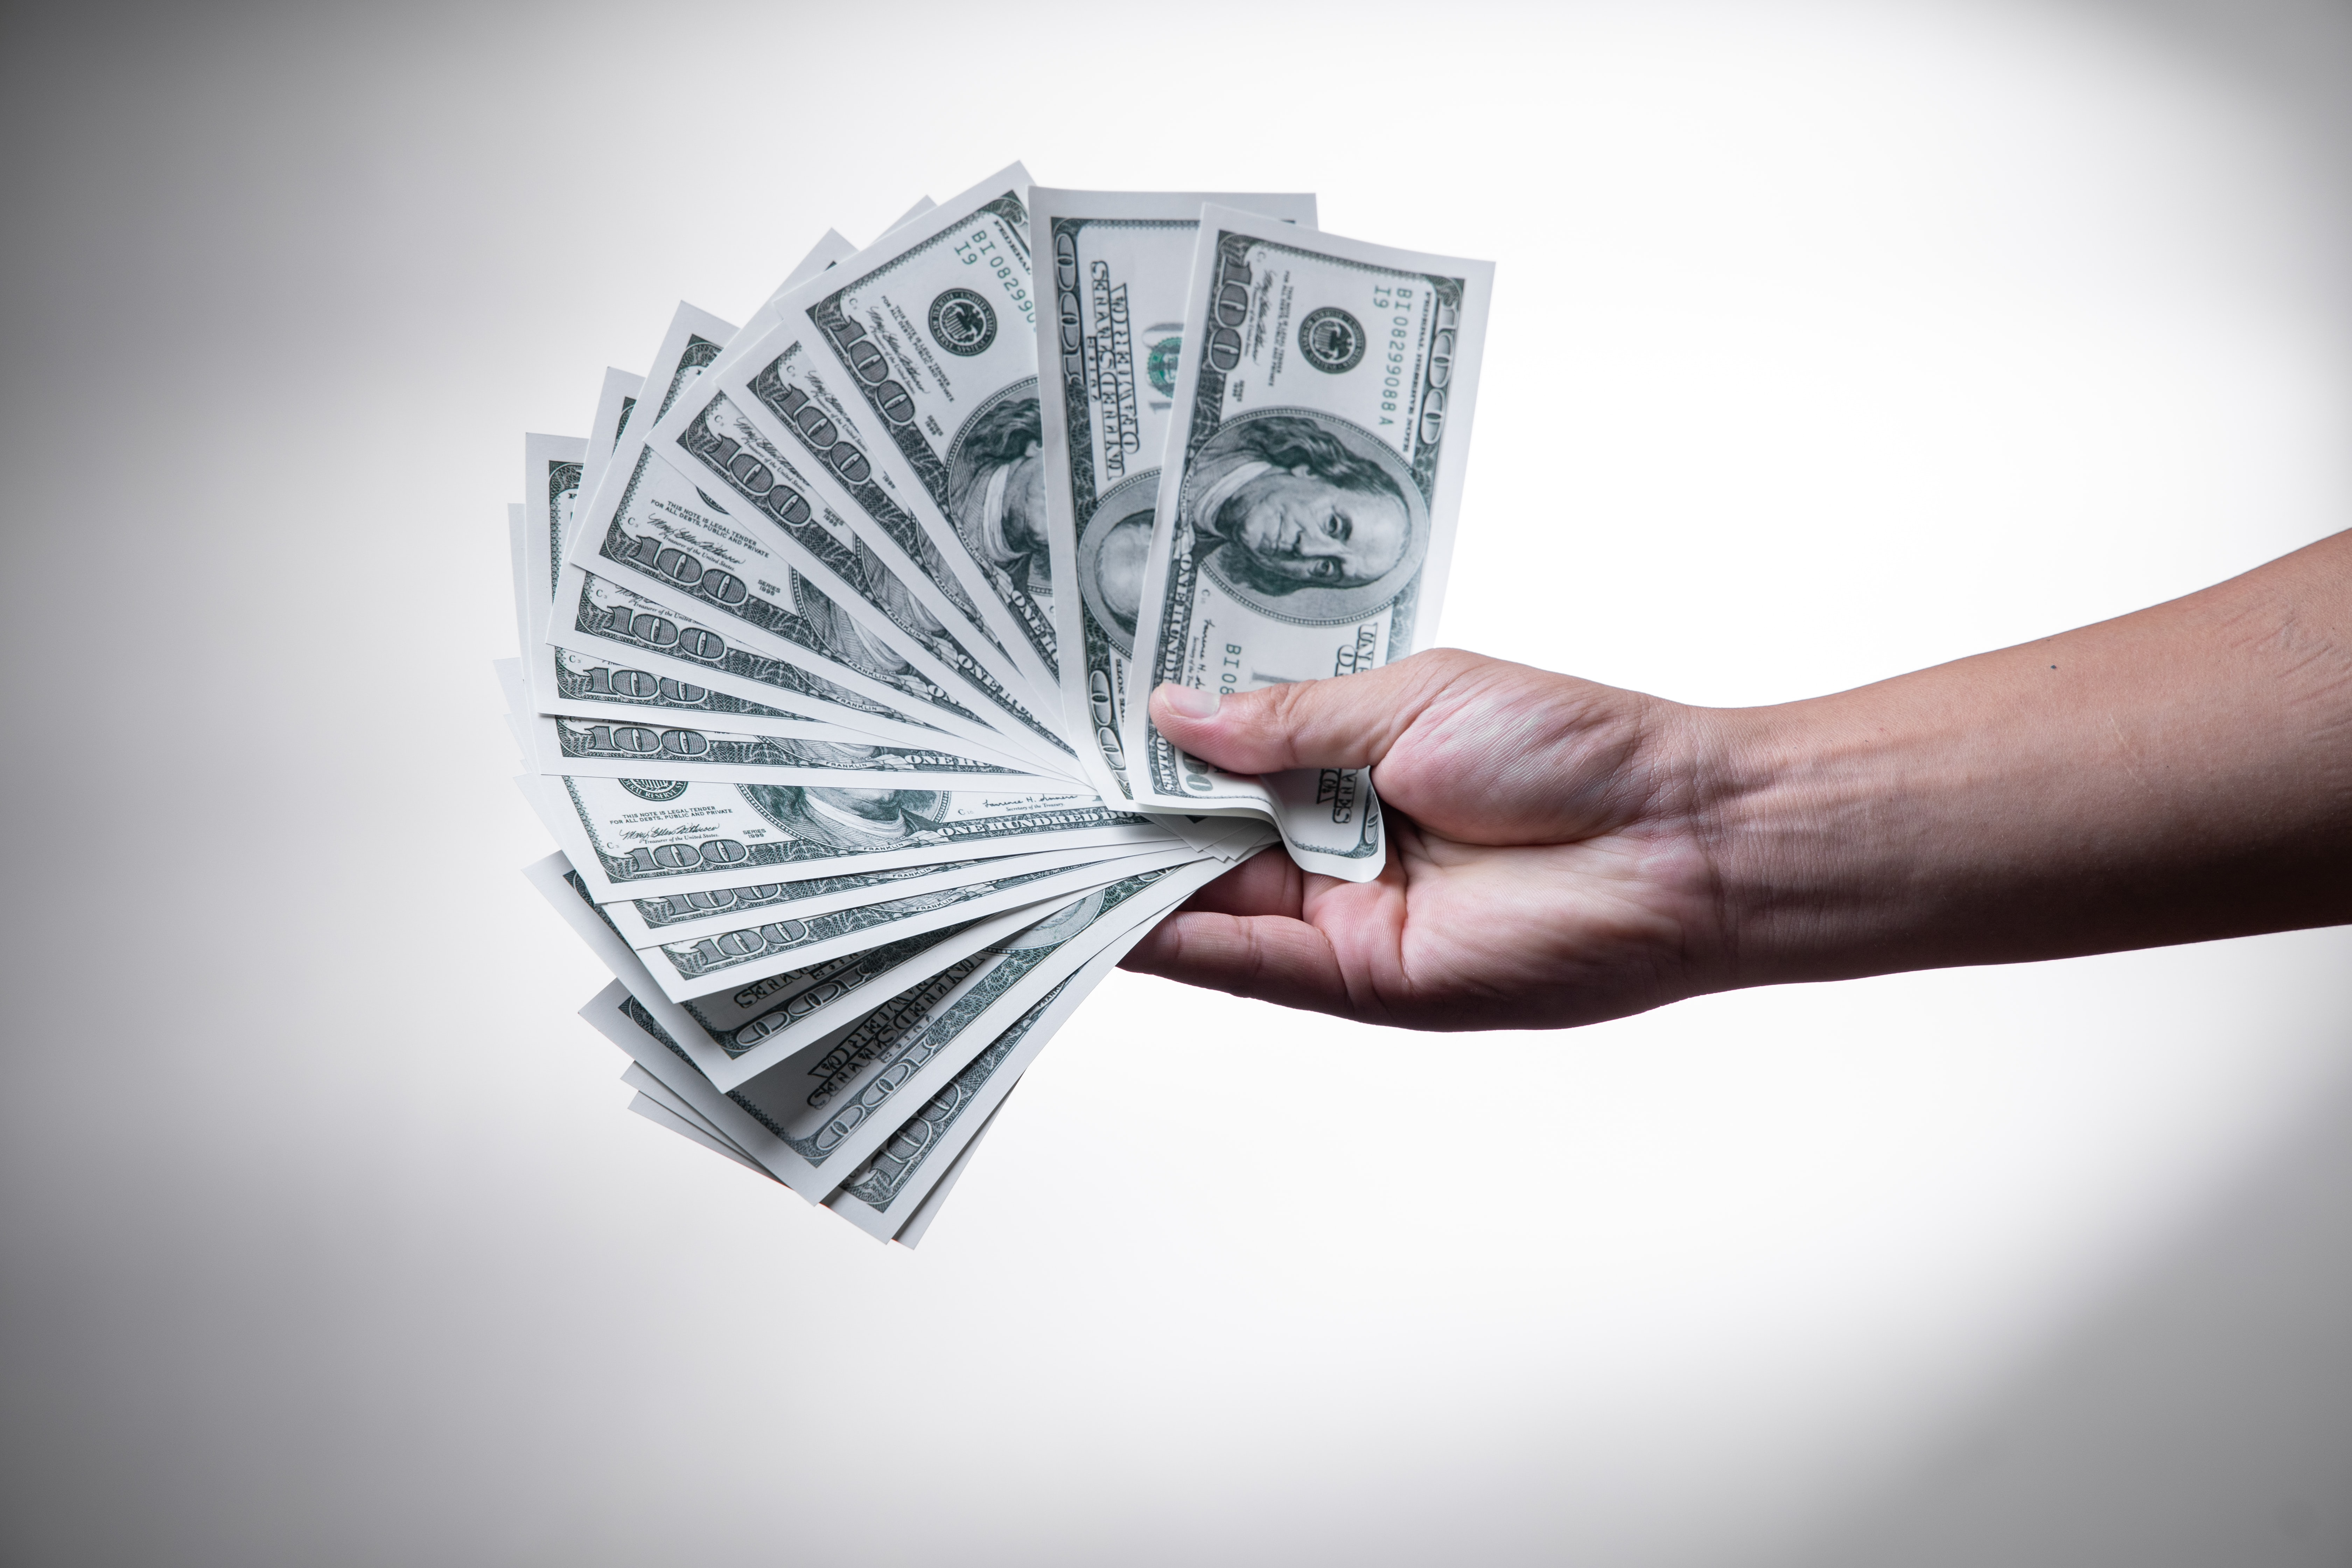

Lorsqu'une banque prête de l'argent à une personne, elle prend le risque que cette dernière ne rembourse pas cet argent dans le délai convenu. Ce risque est appelé **Risque de Crédit**. Alors avant d'octroyer un crédit, les banques vérifient si le client (ou la cliente) qui demandent un prêt sera capable ou pas de le rembourser. Cette vérification se fait grâce à l'analyse de plusieurs paramètres tels que les revenus, les biens, les dépenses actuelles du client, etc. Cette analyse est encore effectuée manuellement par plusieurs banques. Ainsi, elle est très consommatrice en temps et en ressources financières. 

Grâce au **Machine Learning**, il est possible d'automatiser cette tâche et de pouvoir prédire avec plus de précision les clients qui seront en défaut de paiement. 

Dans ce projet, nous allons construire un algorithme capable de prédire si une personne sera en défaut de paiement ou pas (1 : défaut, 0 : non-défaut). Il s'agit donc d'un problème de classification car nous voulons prédire une variable discrète (binaire pour être précis).


# <font color=green> Importation des librairies et des données

In [1]:
# Importation des librairies

library(tidyverse)

library(ggthemes)

library(ROSE)

library(pROC)

# Paramètres du rendu des graphiques

options(repr.plot.width=6, repr.plot.height=4)

theme_set(theme_minimal())

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'ROSE' was built under R version 3.6.3"Loaded ROSE 0.0-3

Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

En ce qui concerne les données, il s'agit des informations collectées sur d'anciens clients ayant contracté des prêts qui sont utilisées pour prédire le comportement des nouveaux clients. 

Deux (02) types de données peuvent être utilisés pour modéliser la probabilité de défaut de
paiement :

• **Données liées à la demande de crédit** ;

• **Données comportementales décrivant le bénéficiaire du prêt**.

Dans la pratique, les banques utilisent un mélange de ces deux types de données pour construire
leur **modèle de scoring** appliqué à la gestion du risque de crédit.



In [2]:
# Importation des données

url = 'https://github.com/JosueAfouda/Credit-Risk-Modeling/raw/master/data_credit.txt'

df <- read.csv(url)

head(df)

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
22,59000,RENT,123,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2


In [3]:
# Structure de la dataframe

str(df)

'data.frame':	32581 obs. of  12 variables:
 $ person_age                : int  22 21 25 23 24 21 26 24 24 21 ...
 $ person_income             : int  59000 9600 9600 65500 54400 9900 77100 78956 83000 10000 ...
 $ person_home_ownership     : Factor w/ 4 levels "MORTGAGE","OTHER",..: 4 3 1 4 4 3 4 4 4 3 ...
 $ person_emp_length         : int  123 5 1 4 8 2 8 5 8 6 ...
 $ loan_intent               : Factor w/ 6 levels "DEBTCONSOLIDATION",..: 5 2 4 4 4 6 2 4 5 6 ...
 $ loan_grade                : Factor w/ 7 levels "A","B","C","D",..: 4 2 3 3 3 1 2 2 1 4 ...
 $ loan_amnt                 : int  35000 1000 5500 35000 35000 2500 35000 35000 35000 1600 ...
 $ loan_int_rate             : num  16 11.1 12.9 15.2 14.3 ...
 $ loan_status               : int  1 0 1 1 1 1 1 1 1 1 ...
 $ loan_percent_income       : num  0.59 0.1 0.57 0.53 0.55 0.25 0.45 0.44 0.42 0.16 ...
 $ cb_person_default_on_file : Factor w/ 2 levels "N","Y": 2 1 1 1 2 1 1 1 1 1 ...
 $ cb_person_cred_hist_length: int  3 2 3 2 4 2 

Les données proviennent de [Kaggle](https://www.kaggle.com/laotse/credit-risk-dataset) qui la plus célèbre plateforme de compétitions en Data Science.

L'ensemble des données compte 12 variables et 32581 observations (lignes) historiques. Chaque observation correspond à une personne ayant contracté un prêt. On a des variables qui décrivent le prêt (montant, statut, taux d'intérêt, etc.) et d'autres variables qui décrivent la personne ayant ontracté ce prêt (age, revenu, etc.). Nous allons donc utiliser ces données historiques afin de construire le modèle de *scoring* qui va prédire le statut des nouveaux candidats à un crédit.               
Il est très important de comprendre les variables de notre jeu de données :    
* ***person_age*** : variable indiquant l'âge de la personne ;           
* ***person_income*** : variable indiquant le revenu annuel (ou encore le salaire) de la personne ;             
* ***person_home_ownership*** : variable indiquant le statut de la personne par rapport à son lieu d'habitation (popriétaire, locataire, etc.) ;        
* ***person_emp_length*** : variable indiquant la durée (en mois) depuis laquelle la personne est en activité professionnelle ;           
* ***loan_intent*** : variable indiquant le motif du crédit ;          
* ***loan_grade*** : Notation de la solvabilité du client. classes de A à G avec A indiquant la classe de solvabilité la plus élevée et G la plus basse ;           
* ***loan_amnt*** : variable indiquant le montant du prêt ;                 
* ***loan_int_rate*** : variable indiquant le taux d'intérêt du crédit ;       
* ***loan_status*** : c'est la variable d'intérêt. Elle indique si la personne est en défaut de paiement (1) ou pas (0) ;       
* ***loan_percent_income*** : variable indiquant le pourcentage du crédit par rapport au revenu (ratio dette / revenu) ;          
* ***cb_person_default_on_file*** : variable indiquant si la personne a été en défaut de paiement ou pas dans le passé                  
* ***cb_person_cred_hist_length*** : variable indiquant la durée des antécédents de crédits.     

Passons à présent à l'analyse exploratoire des données qui nous permettra de mieux les comprendre.

# <font color=green> Analyse exploratoire des données

In [4]:
# Résumé statistique

summary(df)

   person_age     person_income     person_home_ownership person_emp_length
 Min.   : 20.00   Min.   :   4000   MORTGAGE:13444        Min.   :  0.00   
 1st Qu.: 23.00   1st Qu.:  38500   OTHER   :  107        1st Qu.:  2.00   
 Median : 26.00   Median :  55000   OWN     : 2584        Median :  4.00   
 Mean   : 27.73   Mean   :  66075   RENT    :16446        Mean   :  4.79   
 3rd Qu.: 30.00   3rd Qu.:  79200                         3rd Qu.:  7.00   
 Max.   :144.00   Max.   :6000000                         Max.   :123.00   
                                                          NA's   :895      
            loan_intent   loan_grade   loan_amnt     loan_int_rate  
 DEBTCONSOLIDATION:5212   A:10777    Min.   :  500   Min.   : 5.42  
 EDUCATION        :6453   B:10451    1st Qu.: 5000   1st Qu.: 7.90  
 HOMEIMPROVEMENT  :3605   C: 6458    Median : 8000   Median :10.99  
 MEDICAL          :6071   D: 3626    Mean   : 9589   Mean   :11.01  
 PERSONAL         :5521   E:  964    3rd Qu.:12

* Nous remarquons que les moyennes et les écart-types sont très différents d'une variable à une autre. Cela indique que les données ne sont pas à la même échelle. Il faudra probablement normaliser les données avant de les modéliser. en effet, certains algoritmes de Machine Learning nécessitent une normalisation des données pour un meilleur résultat.     

* De plus, il y a des valeurs manquantes au niveau des variables *person_emp_length* et *loan_int_rate*. Ces deux variables contiennent probablement des valeurs aberantes vu la différence très importante entre leur 3è quartile et leur maximum. Les valeurs aberantes sont très distantes des autres valeurs et ne sont donc pas représentatives de l'ensemble des données. Elles peuvent causer d'importatantes erreurs de modélisation.

Dans la partie consacrée au nettoyage des données, nous aurons principalement à traiter les valeurs aberrantes (*outliers*) et les valeurs manquantes.

Passons maintenat à l'analyse de la variable cible (*loan_status*).


       0        1 
0.781836 0.218164 


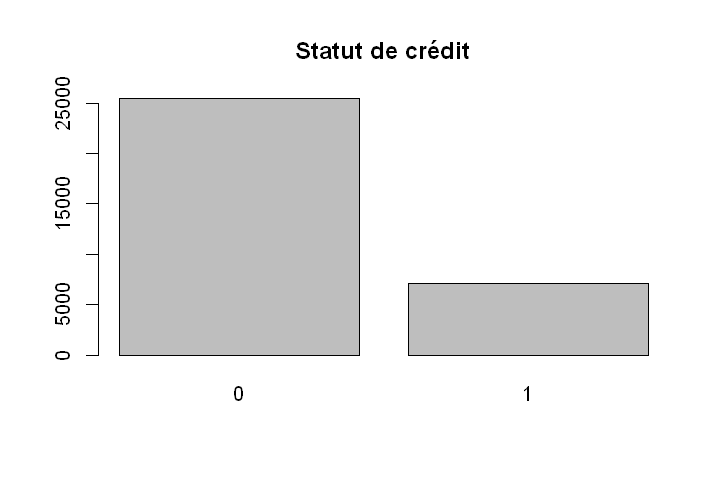

In [5]:
# Transformation de la variable cible en variable catégorielle

df$loan_status <- as.factor(df$loan_status)

# Table de fréquence de la variable cible ('loan_status')

print(prop.table(table(df$loan_status)))

# Diagramme à barre de la variable 'loan_status'

plot(df$loan_status, main = "Statut de crédit")

Warning message:
"Removed 895 rows containing missing values (geom_point)."

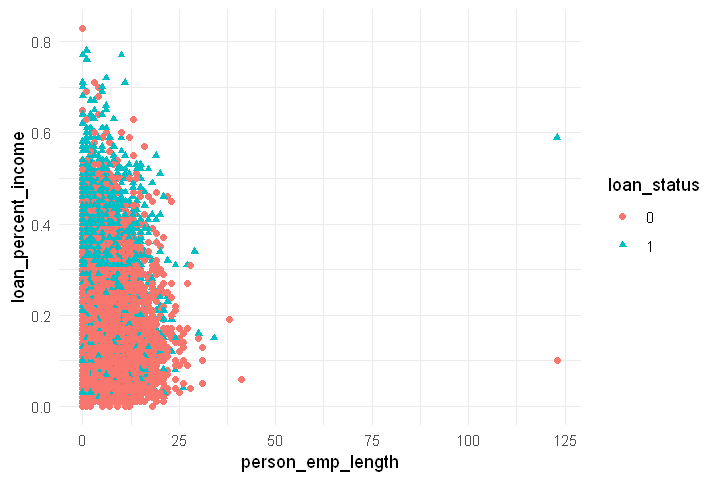

In [6]:
# Nuage de point entre la variable cible et durée d'activité professionnelle

ggplot(df, aes(x=person_emp_length, y=loan_percent_income)) +
    geom_point(aes(color = loan_status, shape = loan_status))

Ces résultats montrent qu'il y un déséquilibre de classe très importants dans les données. En effet, seulement environ 22% de clients sont en défaut de paiement contre un peu plus de 78% de bons clients. 

Le déséquilibre de classe est souvent observé dans les données de crédit. la majorité des demandeurs de crédit sont incités à ne pas être en défaut de paiement car plus ils remboursent le crédit dans les délais, plus leurs côtes de crédit augmentent et donc ils peuvent à nouveau emprunter pour effectuer d'autres investissements.

Si le déséquilibre observé ici est tout à fait normal, il n'en demeurre moins que cela représente un grand défi de classification pour les algorithmes de Machine Learning.

Dans la partie préparation des données pour la modélisation, il va falloir résoudre ce problème.

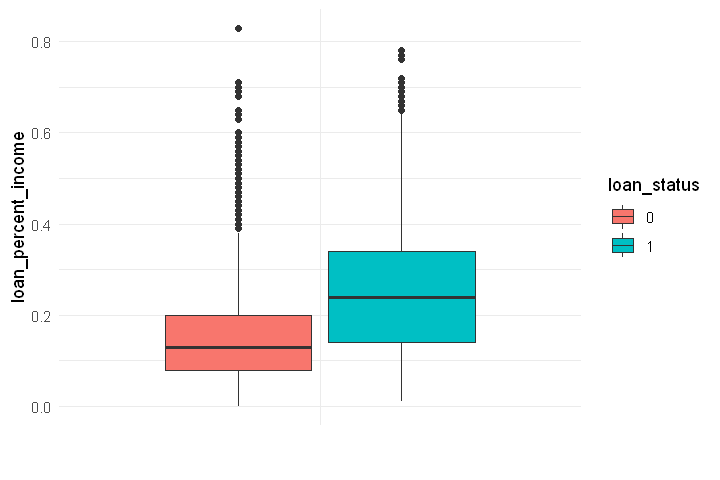

In [7]:
# loan_percent_income vs loan_status

ggplot(df, aes(x = "", y=loan_percent_income, fill = loan_status)) +
    geom_boxplot() +
    labs(x = "", y = "loan_percent_income")

Selon ce garphique, le ratio moyen dette/revenu est plus élevé chez les clients en défaut de paiement que chez les bons clients. En effet, lorsque le ration dette / revenu est très élévé, cela veut dire tout simplement que le crédit est trop élevé par rapport aux revenus de la personne. Et lorsqu'une personne a un crédit trop élevé par rapport à ses revenus, le risque qu'elle soit en défaut de paiement est logiquement et naturellement important.



In [8]:
# Fonction de contruction d'un graphique montrant la relation 
    #entre une variable indépendante et la variable cible

show_relation <- function(data, feature, title_y) {
    ggplot(data, aes(x = "", y=feature, fill = loan_status)) +
        geom_boxplot() +
        labs(x = "", y = title_y)
}

Les personnes qui ont été en défaut de paiement ont en moyenne un montant de crédit plus élevé que les autres comme le montre le graphique ci-dessous :

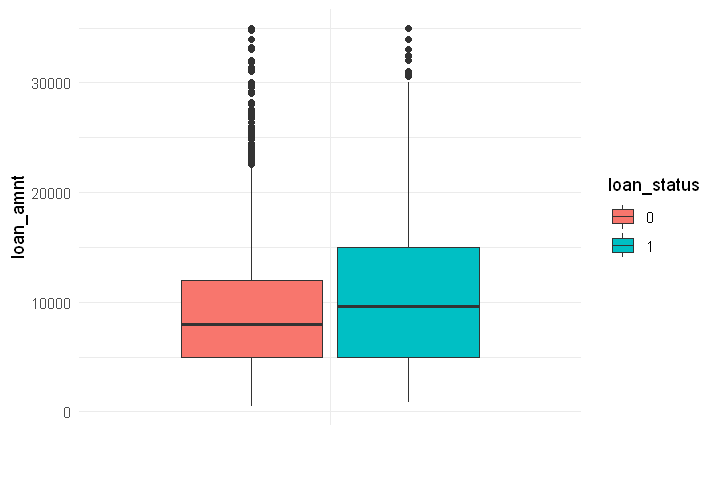

In [9]:
# loan_amnt vs loan_status

show_relation(df, df$loan_amnt, "loan_amnt")

Construisons l'histogramme de la variable indiquant le montant du crédit :

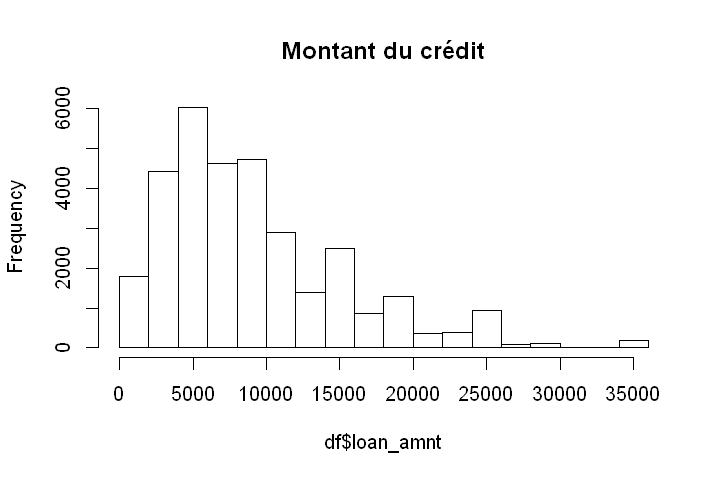

In [10]:
# Histogramme du montant du crédit

hist(df$loan_amnt, main = "Montant du crédit")

D'après le graphique ci-dessus, la distribution variable indiquant le montant du crédit est asymétrique positive (étalée vers la droite donc ne suit probablement pas une loi normale.

Plusiuers algorithmes de Machine Learning sont conçus pour fonctionner avec des données gaussiennes. Donc, pour ne pas avoir des résultats biaisés, il est indispensable de vérifier l'asymétrie de chaque variable quantitative et d'effectuer si besoin une transformation de variable avant la phase de modélisation. 

Il est intéressant de visualiser la distribution de la variable indiquant le montant du crédit chez les personnes en défaut de paiement et chez les autres afin de pouvoir effectuer une comparaison.

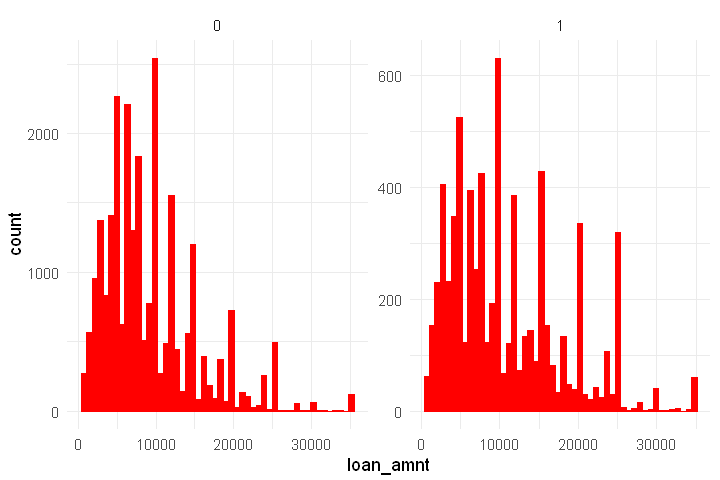

In [11]:
# Histogramme de 'loan_amnt' discrétisé par 'loan_status'

ggplot(df, aes(x=loan_amnt)) +
    geom_histogram(color="red", fill="red", bins=50) +
    facet_wrap(~ loan_status, scales="free", ncol=2)

Les deux histogrammes semblent être identiques mais en observant très bien on constate on remarque par exemple que les barres au niveau des montants très élevés sont plus longues chez les personnes en défaut de paiement que chez les autres. Cela veut dire qu'il y a beaucoup plus de personnes en défaut de paiement qui ont emprunté de grosses d'argent en comparaison aux personnes qui ne sont pas en défaut de paiement.

Analysons à présent la variable indiquant le revenu annuel ainsi que sa relation avec la variable cible :

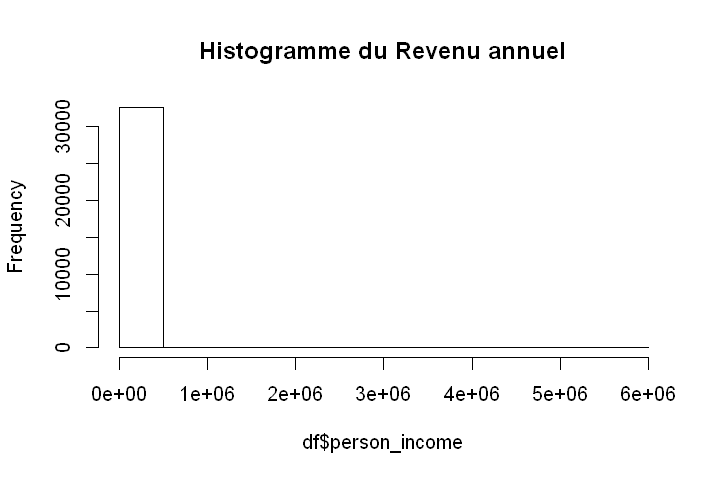

In [12]:
# Histogramme des revenus annuels

hist(df$person_income, main = "Histogramme du Revenu annuel")

L'histogramme des revenus annuels a une seule grande barre ce qui montre qu'il y a une certaine anomalie au niveau des valeurs de cette variable. En effet, le résumé statistique de la variable ***person_income*** ainsi que son histogramme révèlent la présence de valeurs aberrantes (*outliers*) au niveau de cette variable. Nous pouvons aussi voir ces *ouliers* en traçant un nuage de points :

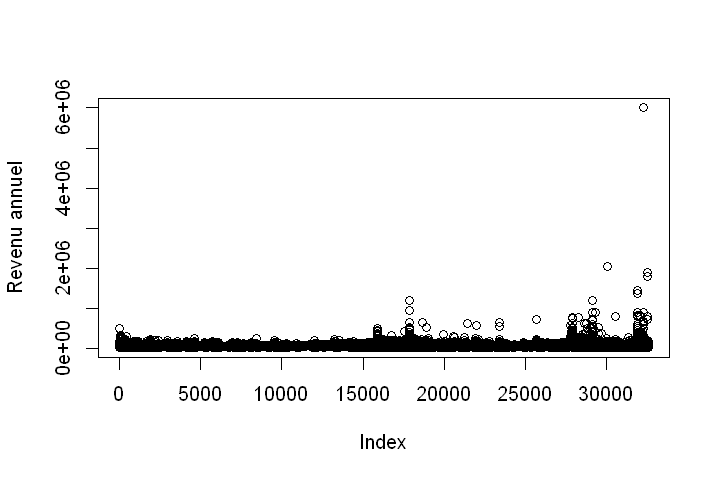

In [13]:
# Nuage de points

plot(df$person_income, ylab="Revenu annuel")

Le nuage de points ci-dessus confirme bel et bien la présence de valeurs aberrantes au niveau de la variable indiquant le revenu annuel. Il y a un salaire énorme de 6 millions de dollars alors tous les autres salaires annuels ne dépasse pas environ 2 millions de dollars.

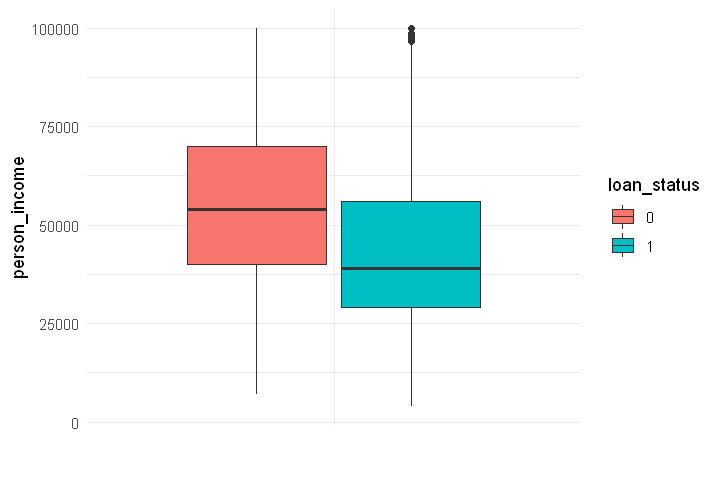

In [14]:
# person_income vs loan_status

show_relation(subset(df, df$person_income < 100000), subset(df, df$person_income < 100000)$person_income, "person_income")

Les personnes qui ont été en défaut de paiement ont en moyenne un revenu annuel inférieur à celui des bons clients. Ctte information renfonce notre connaissance acquise précédemment quant au profil des personnes en défaut de paiement.

Est-ce que le taux d'intérêt influence sur le faut que le remboursement du crédit ou non ? 

Avant de tracer un graphique montrant la relation entre le taux d'intérêt et la variable cible, visualisons d'abord l'histogramme de la variable indiquant le taux d'intérêt :

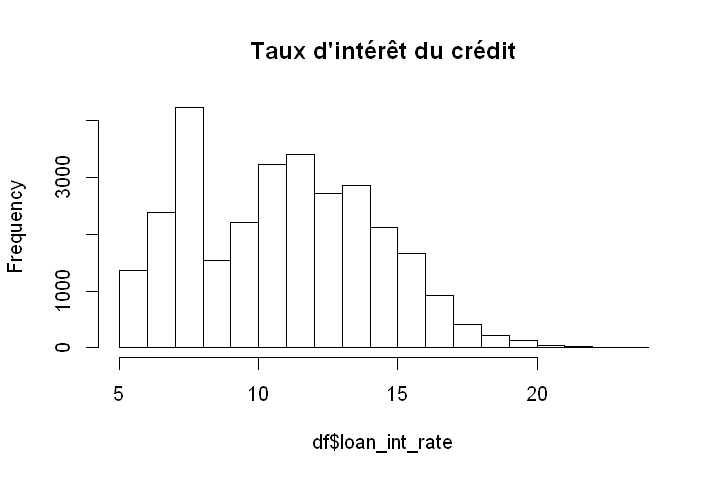

In [15]:
# Histogramme du taux d'intérêt

hist(df$loan_int_rate, main = "Taux d'intérêt du crédit")

Tous les crédits ont un taux d'intérêt supérieur à 5% et très peu de crédits ont un taux d'intérêt supérieur à 20%

Warning message:
"Removed 3116 rows containing non-finite values (stat_boxplot)."

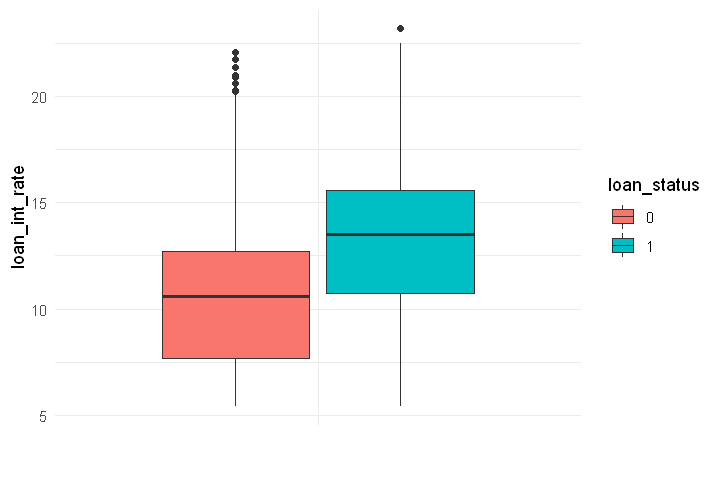

In [16]:
# loan_int_rate vs loan_status

show_relation(df, df$loan_int_rate, "loan_int_rate")

Les personnes en défaut de paiement ont en moyenne un taux d'intérêt plus élevé que les personnes qui ne sont pas en défaut de paiement. Ce résultat vient confirmer les résultats précédents sur le comportement des personnes en défaut de paiement. En effet, nous avons vu que ces personnes empruntent beaucoup plus de grosses sommes que les autres donc des crédits à forts taux d'intérêt. 

Le temps pendant lequel une personne est restée en activité professionnelle peut probablement condirionner le remboursement ou non de son crédit. Construisons un histogramme de la variable *person_emp_length*.

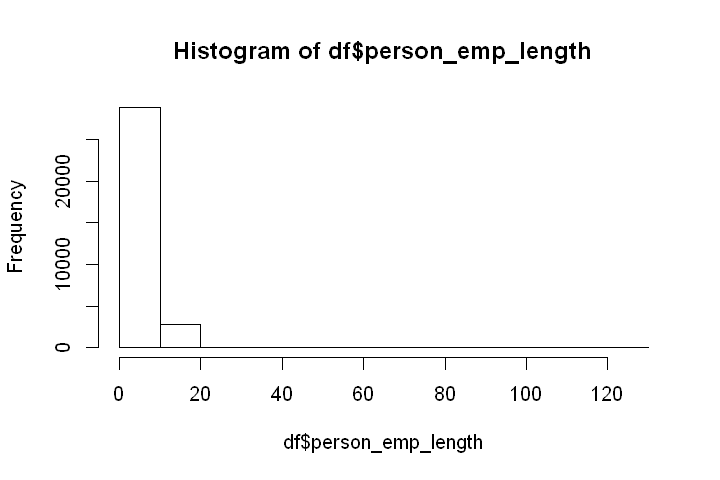

In [17]:
# Histogramme de la varaible person_emp_length

hist(df$person_emp_length)

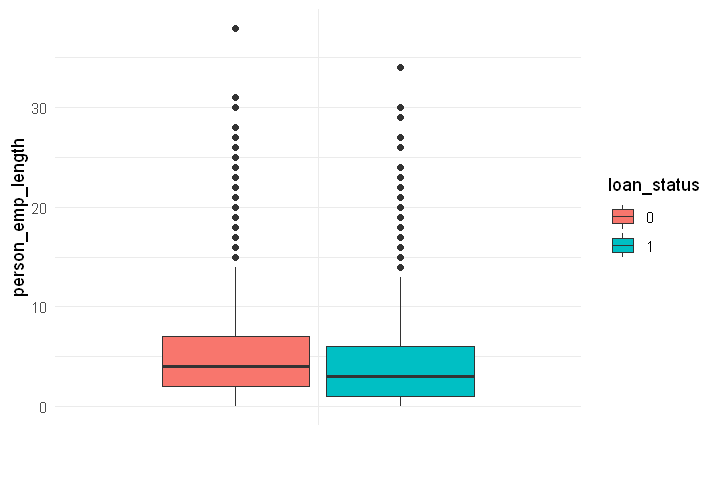

In [18]:
# person_emp_length vs loan_status

show_relation(subset(df, df$person_emp_length < 40), 
              subset(df, df$person_emp_length < 40)$person_emp_length, 
              'person_emp_length')

Il apparaît que les personnes en défaut de paiement ont en moyenne une durée d'activité professionnelle inférieure à celle des autres.

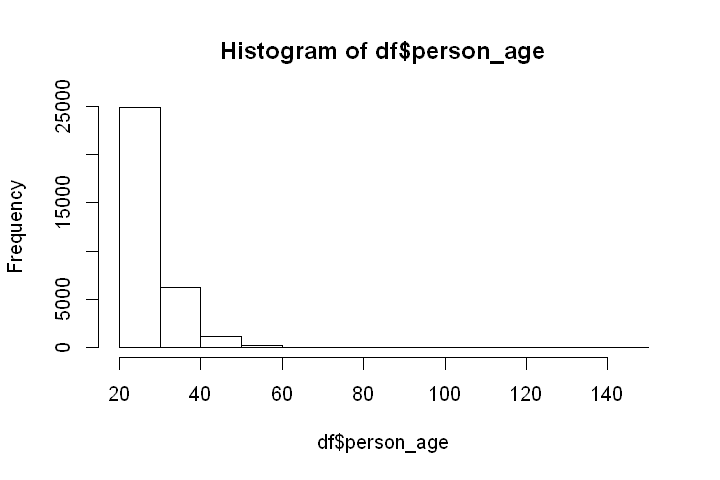

In [19]:
# Histogramme de la variable indiquant l'âge

hist(df$person_age)

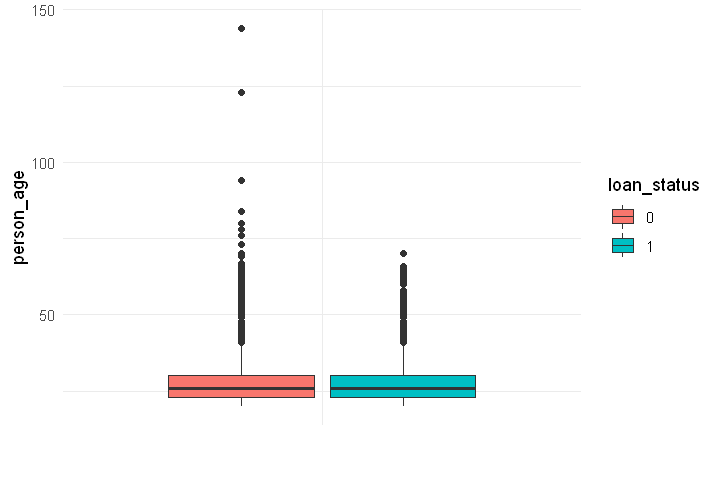

In [20]:
# person_age vs loan_status

show_relation(df, df$person_age, 'person_age')

Il semble que l'âge n'a aucune influence sur le remboursement ou non d'un crédit.

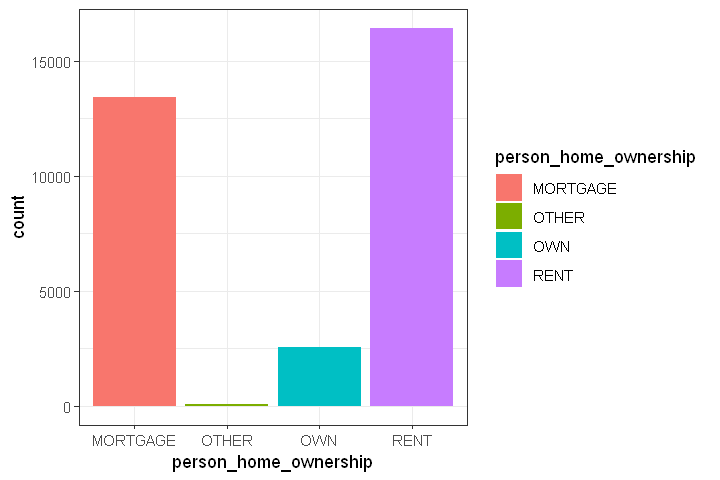

In [21]:
# Variable 'person_home_ownership'

df %>%
    ggplot(aes(x=person_home_ownership, fill = person_home_ownership)) +
    geom_bar() +
    theme_bw()

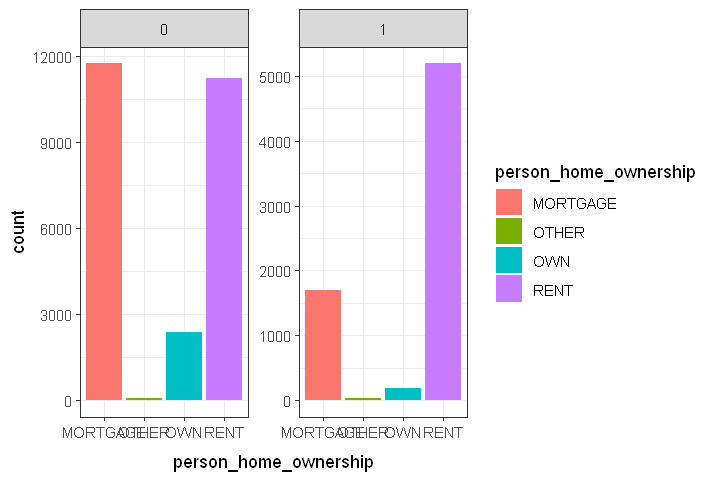

In [22]:
# person_home_ownership

df %>%
    ggplot(aes(x=person_home_ownership, fill = person_home_ownership)) +
    geom_bar() +
    theme_bw() +
    facet_wrap(~ loan_status, scales = "free", ncol = 2)

Pour finir cette analyse exploratoire, analysons les motifs pour lesquels les personnes empruntent de l'argent :

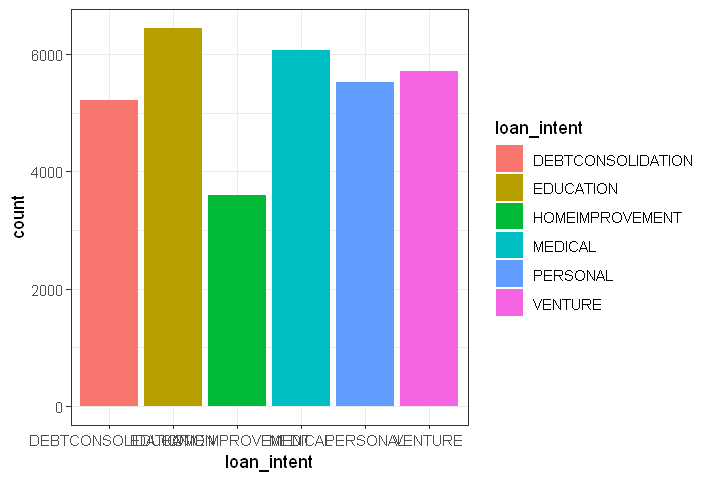

In [23]:
# Motif de l'emprunt

df %>%
    ggplot(aes(x=loan_intent, fill = loan_intent)) +
    geom_bar() +
    theme_bw()

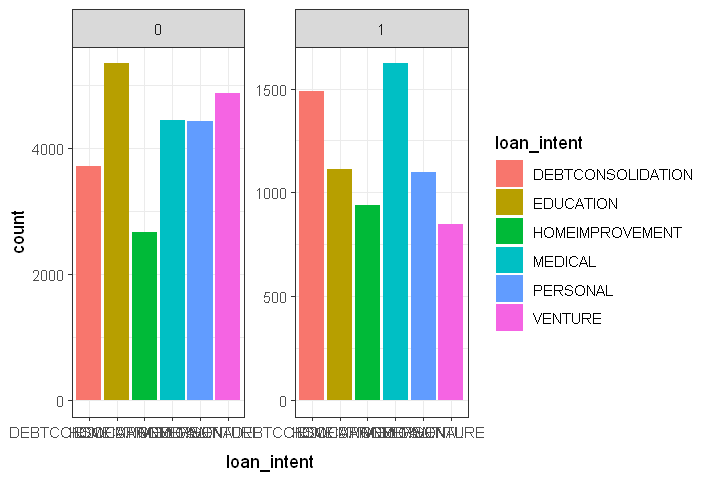

In [24]:
# Motif de l'emprunt discrétisé selon la variable cible

df %>%
    ggplot(aes(x=loan_intent, fill = loan_intent)) +
    geom_bar() +
    theme_bw() +
    facet_wrap(~ loan_status, scales = "free", ncol = 2)

# <font color=green> Nettoyage des données

In [25]:
# Création d'une copie de la dataframe df

df_clean <- df

In [26]:
# Nombre de lignes initial dans df_clean

nrow(df_clean)

[1] 32581

## ***Outliers***

Lors de l'analyse exploratoire des données, nous avons remarqué la présence de valeurs aberrantes. Ces valeurs aberrantes peuvent affecter la qualité d'un modèle de Machine Learning. Nous allons donc traiter. Avant de traiter les valeurs aberrantes, il faut d'abord les détecter. 

Il existe plusieurs méthodes de détection des *outliers*. Selon la méthode de la gamme interquartile (*IQR*), une valeur est aberante si :  $$valeur < Q_1−1.5 * IQR$$ ou $$valeur > Q_3 + 1.5 * IQR$$ avec $$IQR = Q_3 - Q_1$$

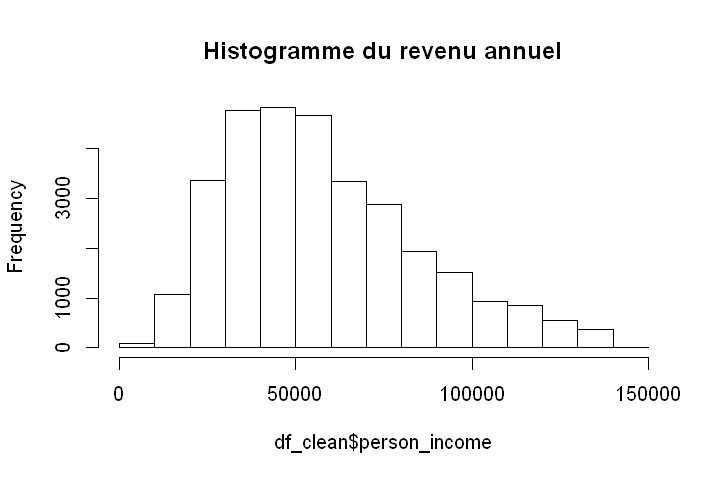

In [27]:
# Identification des valeurs aberantes au niveau de la variable 'person_income'

index_outlier_income <- which(df_clean$person_income < quantile(df_clean$person_income, 0.25) - 1.5 * IQR(df_clean$person_income) | df_clean$person_income > quantile(df_clean$person_income, 0.75) + 1.5 * IQR(df_clean$person_income))

# Suppression des valeurs aberantes au niveau de la variable 'person_income'

df_clean <- df_clean[-index_outlier_income, ]

# Vérification : Histogramme des revenus annuels

hist(df_clean$person_income, main = "Histogramme du revenu annuel")

Après suppression des valeurs aberantes, l'histogramme des revenus annuels a un meilleur aspect et est beaucoup plus informatif que celui construit précédemment avec les données originelles.

Une autre manière de suppimer les valeurs aberrantes au niveau des données est de faire une simple filtration sur la base des informations recueillies  lors de l'analyse exploratoire et du "bon sens".

Il est vrai que dans certaines une banque puisse accorder un crédit à une personne très âgée mais ce n'est pas ce qui se fait en règle générale. 

In [28]:
# Suppression des valeurs aberrantes au niveau de la variabe 'person_age'

df_clean <- subset(df_clean, df_clean$person_age < 100)

In [29]:
# Nombre de lignes final dans df_clean

nrow(df_clean)

[1] 31095

## Valeurs manquantes

Il existe deux principales techniques pour traiter les valeurs manquantes :    
* **Supression** des lignes contenant des valeurs manquantes ;                 
* **Remplacement** des valeurs manqauntes en faisant des imputations par la moyenne, la médiane, ...etc de la variable contenant ces valeurs manquantes. Il existe également d'autres méthodes d'imputation plus ou moins sophistiquées comme la méthode des k plus proches voisins (***KNN***). 

Dans la pratique, il est conseillé de choisir une méthode puis de construire et d'évaluer le modèle. Puis de changer la méthode d'imputation et reconstruit le modèle ainsi de suite afin de finalement choisir une méthode qui donne les meilleurs résultats.

Commençons par une imputation par la médiane :

In [30]:
# Variable person_emp_length

index_NA_person_emp_length <- which(is.na(df_clean$person_emp_length))

df_clean$person_emp_length[index_NA_person_emp_length] <- median(df_clean$person_emp_length, na.rm=TRUE)

# Variable loan_int_rate

index_NA_rate <- which(is.na(df_clean$loan_int_rate))

df_clean$loan_int_rate[index_NA_rate] <- median(df_clean$loan_int_rate, na.rm=TRUE)

In [31]:
# Vérification (person_emp_length)

print(summary(df_clean$person_emp_length))

# Vérifiaction (loan_int_rate)

print(summary(df_clean$loan_int_rate))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   4.000   4.688   7.000 123.000 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.42    8.49   10.99   11.00   13.11   23.22 


# <font color=green> Préparation des données pour la phase de modélisation

## Normalisation des variables numériques

In [32]:
# Création d'une copie de df_clean

df_clean2 <- df_clean

In [33]:
# Création d'une fonction de normalisation

normalize <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

In [34]:
# Normalisation des données 
    #réaprtir les valeurs entre 0 et 1 tout en gardant les distributions originales

for (col in colnames(df_clean2)) {
    if (class(df_clean2[, col]) != 'factor') {
        df_clean2[, col] <- normalize(df_clean2[, col])
    }
}

In [35]:
# Vérification de la normalisation

head(df_clean2)

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0.02702703,0.40439987,RENT,1.000000000,PERSONAL,D,1.00000000,0.59550562,1,0.7073171,Y,0.03571429
0.01351351,0.04117526,OWN,0.040650407,EDUCATION,B,0.01449275,0.32134831,0,0.1097561,N,0.00000000
0.06756757,0.04117526,MORTGAGE,0.008130081,MEDICAL,C,0.14492754,0.41853933,1,0.6829268,N,0.03571429
0.04054054,0.45219258,RENT,0.032520325,MEDICAL,C,1.00000000,0.55112360,1,0.6341463,N,0.00000000
0.05405405,0.37057734,RENT,0.065040650,MEDICAL,C,1.00000000,0.49719101,1,0.6585366,Y,0.07142857
0.01351351,0.04338108,OWN,0.016260163,VENTURE,A,0.05797101,0.09662921,1,0.2926829,N,0.00000000


## Données d'entraînement et de test

Commençons par diviser les données en un ensemble pour entraîner les algorithmes et un ensemble de test pour évaluer la capacité du modèle à généraliser sur de nouvelles données (performance du modèle construit).

In [36]:
# Données d'entraînement (80%) et de test (20%) (Division aléatoire avec la fonction sample)

seed <- 131

set.seed(seed)

index_train <- sample(1:nrow(df_clean2), 0.8 * nrow(df_clean2))

train_set <- df_clean2[index_train, ]

test_set <- df_clean2[-index_train, ]

In [37]:
# Nombre de lignes dans train_set et test_set

print(nrow(train_set))

print(nrow(test_set))

[1] 24876
[1] 6219


Assurons-nous d'avoir la même distribution de classes de la variable cible au niveau des 2 ensembles et des données originelles :

In [38]:
# Table de fréquence de la variable cible dans l'ensemble d'entraînement

prop.table(table(train_set$loan_status))


        0         1 
0.7779788 0.2220212 

In [39]:
# Table de fréquence de la variable cible dans l'ensemble de test

prop.table(table(test_set$loan_status))


        0         1 
0.7684515 0.2315485 

## Résolution du problème de déséquilibre de classe

Il existe plusieurs techniques pour résoudre le problème de déséquilibre de classe dans les données. Le rééchantillonnage des données est l'une des techniques les plus utilisées. Les méthodes de rééchantillonage souvent utilisées sont : 

* de sous-échantillonement de la classe majoritaire (***Random Under Sampling*** ou [RUS](https://www.rdocumentation.org/packages/ROSE/versions/0.0-3/topics/ROSE)) : cette méthode consiste à tirer au hasard des observations de cas de non-défaut pour correspondre au nombre d'observations de cas de défaut de paiement ;

*  sur-échantillonement de la classe minoritaire (***Random Over Sampling*** ou [ROS](https://www.rdocumentation.org/packages/ROSE/versions/0.0-3/topics/ROSE)) : cette méthode consiste à effectuer des tirages aléatoires d'observations de cas de défaut et dupliquer ces observations afin de correspondre au nombre de cas de non-défaut. 

Ces deux méthodes conduisent à un équilibre parfait des cas de défaut et non-défaut de paiement mais présentent quand même des inconvénients. Avec le sous-échantillonnage, vous supprimez beaucoup d'informations. Dans la plupart des cas, jeter des données n'est pas souhaitable en apprentissage automatique. Avec le sur-échantillonnage, vous créez beaucoup de doublons d'informations ce qui peut causer des biais importants au niveau de l'entraînement des algorithmes.

* Technique de suréchantillonnnage des minorités synthétiques (***Synthetic Minority Oversampling Technique*** ou [SMOTE](https://www.rdocumentation.org/packages/smotefamily/versions/1.3.1/topics/SMOTE) en anglais) : c'est une technique sophistiquée qui ne se contente pas de juste cdupliquer des cas de défaut mais utilise les caractéristiques des plus proches voisins des cas de défaut de paiement pour créer de nouveaux cas de défaut synthétiques. Cette méthode bien qu'utilisant des algorithmes hyper-sophistiqués présente le risque que les voisins les plus proches des cas de défaut ne soient pas en réalité des cas de défaut ce qui peut entraîner des erreurs de modélisation.




<font color=red> N.B : Les méthodes de rééchantillonnage des données pour résoudre le problème de déséquilibre de classe doivent être appliquées uniquement aux données d'entraînement et NON aux données de test.

In [40]:
# Nombre d'observations de la classe majoritaire (non-défauts)

nrow(subset(train_set, train_set$loan_status == 0))

[1] 19353

In [41]:
# Nombre d'observations de la classe minoritaire (défauts)

nrow(subset(train_set, train_set$loan_status == 1))

[1] 5523

**Sur-échantillonnage de la classe minoritaire (*Oversampling*)**

In [42]:
#?ovun.sample

In [43]:
# Méthode de sur-échantillonnage de la classe minoritaire (ROS)

train_oversampled <- ovun.sample(formula = loan_status ~ ., data = train_set, metho = 'over', seed = seed)

# Affichage du résultat

print(class(train_oversampled))

print(summary(train_oversampled))

[1] "ovun.sample"

Call: 
ovun.sample(formula = loan_status ~ ., data = train_set, method = "over", 
    seed = seed)

Summary of data balanced by oversampling 

   person_age      person_income    person_home_ownership person_emp_length
 Min.   :0.00000   Min.   :0.0000   MORTGAGE:13119        Min.   :0.00000  
 1st Qu.:0.04054   1st Qu.:0.2179   OTHER   :  163        1st Qu.:0.01626  
 Median :0.08108   Median :0.3335   OWN     : 2358        Median :0.03252  
 Mean   :0.10223   Mean   :0.3679   RENT    :23059        Mean   :0.03649  
 3rd Qu.:0.13514   3rd Qu.:0.4853                         3rd Qu.:0.04878  
 Max.   :1.00000   Max.   :1.0000                         Max.   :1.00000  
                                                                           
            loan_intent   loan_grade   loan_amnt      loan_int_rate   
 DEBTCONSOLIDATION:6844   A:10441    Min.   :0.0000   Min.   :0.0000  
 EDUCATION        :7240   B:11464    1st Qu.:0.1304   1st Qu.:0.2360  
 HOMEIMPROVEMENT 

In [44]:
# Dataframe obtenue par la méthode de sur-échantillonnage de la classe minoritaire

train_oversampled_df <- train_oversampled$data

head(train_oversampled_df)

person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0.06756757,0.6691274,MORTGAGE,0.073170732,EDUCATION,A,0.50724638,0.11741573,0,0.21951220,N,0.07142857
0.08108108,0.4411635,RENT,0.065040650,DEBTCONSOLIDATION,B,0.20289855,0.24775281,0,0.13414634,N,0.03571429
0.10810811,0.5955707,MORTGAGE,0.000000000,EDUCATION,E,0.68115942,0.76460674,0,0.32926829,N,0.17857143
0.02702703,0.1029381,RENT,0.032520325,DEBTCONSOLIDATION,C,0.05507246,0.46011236,0,0.14634146,Y,0.03571429
0.06756757,0.1647010,MORTGAGE,0.008130081,HOMEIMPROVEMENT,A,0.20289855,0.19550562,0,0.32926829,N,0.03571429
0.05405405,0.9117379,MORTGAGE,0.032520325,EDUCATION,A,0.33333333,0.03426966,0,0.09756098,N,0.00000000


In [45]:
prop.table(table(train_oversampled_df$loan_status))


        0         1 
0.5000904 0.4999096 

**Sous-échantillonnage de la classe majoritaire (*Undersampling*)**

In [46]:
# Méthode de sous-échantillonnage de la classe majoritaire (RUS)

train_undersampled <- ovun.sample(formula = loan_status ~ ., data = train_set, method = 'under', seed = seed)

# Affichage du résultat

print(class(train_undersampled))

print(summary(train_undersampled))

[1] "ovun.sample"

Call: 
ovun.sample(formula = loan_status ~ ., data = train_set, method = "under", 
    seed = seed)

Summary of data balanced by undersampling 

   person_age      person_income    person_home_ownership person_emp_length
 Min.   :0.00000   Min.   :0.0000   MORTGAGE:3726         Min.   :0.00000  
 1st Qu.:0.04054   1st Qu.:0.2154   OTHER   :  44         1st Qu.:0.01626  
 Median :0.08108   Median :0.3309   OWN     : 690         Median :0.03252  
 Mean   :0.10231   Mean   :0.3667   RENT    :6549         Mean   :0.03631  
 3rd Qu.:0.13514   3rd Qu.:0.4840                         3rd Qu.:0.04878  
 Max.   :0.78378   Max.   :1.0000                         Max.   :1.00000  
                                                                           
            loan_intent   loan_grade   loan_amnt      loan_int_rate   
 DEBTCONSOLIDATION:1951   A:2976     Min.   :0.0000   Min.   :0.0000  
 EDUCATION        :2017   B:3188     1st Qu.:0.1304   1st Qu.:0.2360  
 HOMEIMPROVEMEN

In [47]:
# Dataframe obtenue par la méthode de sous-échantillonnage de la classe majoritaire

train_undersampled_df <- train_undersampled$data

In [48]:
prop.table(table(train_undersampled_df$loan_status))


        0         1 
0.4983196 0.5016804 

Il est possible de créer une ensemble de donné équilibré en combinant le sur-échantillonnage de la classe minoritaire et le sous-échantillonnage de la classe majoritaire :

In [49]:
# Combinaison des techniques ROS et RUS

train_ros_rus <- ovun.sample(formula = loan_status ~ ., data = train_set, method = 'both', N = 12000, seed =seed)

# Résultat

train_ros_rus_df <- train_ros_rus$data

prop.table(table(train_ros_rus_df$loan_status))


        0         1 
0.5020833 0.4979167 

# <font color=green> Modélisation

## Choix de la métrique d'évaluation de performance du modèle

**Quelle métrique choisir pour évaluer la performance des modèles ?**

Vous devez préalablement comprendre ce qu'on appelle matrice de confusion.

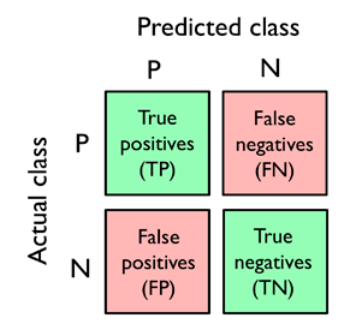

La matrice de confusion est une matrice carrée qui rapporte le nombre de vrais positifs (*True Positives* ou TP), vrais négatifs (*True Négatives* ou TN), faux positifs (*False Positive* ou FP) et faux négatifs (*False Negatives* ou FN).

Dans notre cas, la classe positive est 1 : le client est en défaut de paiement et la classe négative est 0 : le client n'est pas en défaut de paiement.

* **TP** : le client est en défaut de paiement et le modèle prédit qu'il est en défaut de paiement ;

* **TN** : le client n'est pas en défaut de paiement et le modèle prédit qu'il n'est pas en défaut de paiement ;

Les 2 cas ci-dessus (TP et TN) sont les bons cas. Mais FP et FN sont les mauvais cas :

* **FP** : le client n'est pas en défaut de paiement mais le modèle prédit qu'il est en défaut de paiement ;

* **FN** : le client est en défaut de paiement mais le modèle prédit qu'il n'est pas en défaut de paiement.

A partir de la matrice de confusion, vous pouvez calculer certaines métriques pour évaluer la performance du modèle.

* La précision de la classification (***Accuracy*** en anglais) est le pourcentage d'instances correctement classifiées, c'est-à-dire la somme du nombre de vrais négatifs et de vrais positifs divisée par le nombre total des observations. Elles se calcule donc par la formule ci-dessous : 

$$Accuracy = \frac{TN + TP}{(TN + FN + FP + TP)}$$

* La sensibilité du modèle (***Sensitivity*** en anglais) se calcule par la formule ci-dessous : $$Sensitivity = \frac{TP}{(FN + TP)}$$

Dans le cas présent, la sensibilité se traduit par le pourcentage de clients en défaut de paiement (classe positive) qui ont été classifié comme tel par le modèle. Une sensibilité élevée est meilleure.

* La spécificité du modèle (***Specificity*** en anglais) se calcule par la formule ci-dessous : $$Specificity = \frac{TN}{(TN + FP)}$$

Ici, la spécificité est le pourcentage de clients qui ne sont pas en défauts de paiement (classe négative) et qui ont été classififié comme tel par le modèle.

Une spécificité élevée est meilleure. Mais il faudra un compromis entre la sensibilité du modèle et la spécificité car l'amélioration  de la sensibilité diminue la spécificité et l'amélioration de la spécificité diminue la sensibilité.

Il faut faire attention à la précision globale. Une forte précision globale ne signifie pas forcément que le modèle est performant. Le choix de la métrique pour quantifier la performance du modèle doit se faire en fonction du contexte de l'étude, c'est-à-dire de la problématique qu'on veut résoudre.

## Modèle de Régression logistique 

In [50]:
# Création  d'une fonction de construction d'un modèle de régression logistique

log_modeling <- function(train) {
    model <- glm(loan_status ~ ., family = 'binomial', data = train)
    return (model)
}

**Construction et évaluons un modèle de régression logistique en utilisant l'ensemble** ***train_set*** :

In [51]:
# Construction d'un modèle de régression logistique avec tous les prédicteurs disponibles

log_model <- log_modeling(train_set)

# Résumé du modèle

summary(log_model)


Call:
glm(formula = loan_status ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1914  -0.5303  -0.3006  -0.1218   3.0649  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -3.45231    0.12742 -27.093  < 2e-16 ***
person_age                 -0.61202    0.49087  -1.247 0.212468    
person_income              -0.77061    0.24138  -3.193 0.001410 ** 
person_home_ownershipOTHER  0.61742    0.31424   1.965 0.049436 *  
person_home_ownershipOWN   -1.64524    0.11192 -14.700  < 2e-16 ***
person_home_ownershipRENT   0.85323    0.04614  18.490  < 2e-16 ***
person_emp_length          -1.78576    0.66498  -2.685 0.007244 ** 
loan_intentEDUCATION       -0.81461    0.06474 -12.582  < 2e-16 ***
loan_intentHOMEIMPROVEMENT  0.14321    0.07301   1.962 0.049806 *  
loan_intentMEDICAL         -0.14525    0.06124  -2.372 0.017708 *  
loan_intentPERSONAL        -0.59841    0.06634  -9

Certains prédicteurs sont statistiquement significatifs tandis que d'autres ne le sont pas.

In [52]:
# Prédictions sur les données de test

preds_log <- predict(log_model, newdata = test_set, type = 'response')

head(preds_log)

9         11         12         13         14         15 
0.15294352 0.13089120 0.56474833 0.05688180 0.49922268 0.02800178

***preds_log*** donne la probabilité de défaut de paiement de chaque client de l'ensemble des données de test. Pour identifier les mauvais emprunteurs des bons, il faudra définir une valeur seuil. Par exemple, on peut dire que si la probabilité prédite du client est inférieure à 0.5 alors il n'est pas en défaut de paiement et dans le cas contraire, c'est-à-dire pour une probabilité supérieure à 0.5, le client est en défaut de paiement.

Une autre façon de définir le seuil est de considérer la moyenne de la variable cible c'est-à-dire la proportion de la classe 1 (Voir résumé statistique).

In [53]:
# Définition d'un Seuil

seuil <- 0.3

# Conversion des probabilités en résultats (0 ou 1) de la variable 'loan_status'

preds_status <- ifelse(preds_log > seuil, 1, 0)

# Matrice de confusion

conf_mat <- table(test_set$loan_status, preds_status)

In [54]:
conf_mat

   preds_status
       0    1
  0 4182  597
  1  398 1042

In [55]:
# Composants de la matrice de confusion

TP <- conf_mat[2, 2]

TN <- conf_mat[1, 1]

FP <- conf_mat[1, 2]

FN <- conf_mat[2, 1]

In [56]:
# Score de classification

accuracy <- (TP+TN) / nrow(test_set)

accuracy

[1] 0.8400064

* La précicion de classification est égale à 86,22% (seuil égal à 0.5).

* La précision de classification est égale à 85,61% (seuil égal à 0.4).

* La précision de classification est égale à 84% (seuil égal à 0.3).

In [57]:
# Sensibilité du modèle

sensitivity <- TP / (FN + TP)

sensitivity

[1] 0.7236111

* Le modèle prédit correctement 56,6% des clients qui sont en réalité en défaut de paiement (Seuil égal à 0.5).

* Le modèle prédit correctement 64,31% des clients qui sont en réalité en défaut de paiement (Seuil égal à 0.4).

* Le modèle prédit correctement 72,4% des clients qui sont en réalité en défaut de paiement (Seuil égal à 0.3).

In [58]:
# Spécificité du modèle

specificity <- TN / (TN + FP)

specificity

[1] 0.8750785

* Le modèle prédit correctement 95,15% des clients qui ne sont pas en défaut de paiement (Seuil égal à 0.5).

* Le modèle prédit correctement 92,03% des clients qui ne sont pas en défaut de paiement (Seuil égal à 0.4).

* Le modèle prédit correctement 87,51% des clients qui ne sont pas en défaut de paiement (Seuil égal à 0.3).

**On remarque que plus le seuil est élevé, plus le score de classification augmente, plus la sensibilité diminue et plus la spécificité du modèle augmente**. Dans la suite, nous analyserons en profondeur les différentes métriques d'évaluation pour différents seuils. 

Mais avant, créons une fonction d'évaluation de la performance d'un modèle que nous allons pourvoir réutiliser pour d'autres modèles :

In [59]:
# Création d'une fonction d'évaluation de modèle

model_evaluation <- function(Model, Seuil) {
    
    predictions <- predict(Model, newdata = test_set, type = 'response')
    predicted_status <- ifelse(predictions > Seuil, 1, 0)
    Conf_Mat <- table(test_set$loan_status, predicted_status)
    Accuracy <- (Conf_Mat[2,2] + Conf_Mat[1,1]) / nrow(test_set)
    Sensitivity <- Conf_Mat[2,2] / (Conf_Mat[2,2] + Conf_Mat[2,1])
    Specificity <- Conf_Mat[1,1] / (Conf_Mat[1,1] + Conf_Mat[1,2])
    One_minus_spec <- 1 - Specificity
    
    results <- list(Conf_Mat, Accuracy, Sensitivity, Specificity, One_minus_spec)
    names(results) <- c('Matrice de confusion', 'Score de classification', 
                        'Sensibilité du modèle', 'Spécificité du modèle', 
                        'One minus Specificity')
    
    return (results)
}

In [60]:
# Vérification de la fonction

model_evaluation(log_model, 0.3)

$`Matrice de confusion`
   predicted_status
       0    1
  0 4182  597
  1  398 1042

$`Score de classification`
[1] 0.8400064

$`Sensibilité du modèle`
[1] 0.7236111

$`Spécificité du modèle`
[1] 0.8750785

$`One minus Specificity`
[1] 0.1249215


Il est clair que le seuil (la probabilité) à partir duquel on définit si une personne sera en défaut de paiement ou pas influence la performance du modèle de classification. Alors quel seuil "optimal" faut-il choisir ?

Pour répondre à cette question, il serait intéressant de tracer un graphique montrant les résultats des différentes métriques pour divers seuils ce qui permettrait à la banque de prendre une décision en ce qui concerne le seuil "optimal".

In [61]:
# Création d'une fonction d'affichage des résultats de modèles pour divers seuils

print_results <- function(model) {
    
    # définition des seuils
    seuils <- seq(0.01, 0.99, by = 0.01)
    
    # Vecteurs vides pour stocker les métriques
    acc_model <- c()
    sens_model <- c()
    spec_model <- c()
    one_minus_spec_model <- c()

    for (i in seuils) {
        r <- model_evaluation(model, i)
        acc_model <- append(acc_model, r[['Score de classification']])
        sens_model <- append(sens_model, r[['Sensibilité du modèle']])
        spec_model <- append(spec_model, r[['Spécificité du modèle']])
        one_minus_spec_model <- append(one_minus_spec_model, r[['One minus Specificity']])
    }
    
    # Dataframe des métriques pour divers seuils
    resultats <- data.frame(cbind(seuils, acc_model, sens_model, spec_model, one_minus_spec_model))
    
    # Graphique montrant les métriques pour différents seuils
    plots <- ggplot() + 
                geom_line(data=resultats, aes(x=seuils, y=acc_model, colour="red")) + 
                geom_line(data=resultats, aes(x=seuils, y=sens_model,colour="green")) +
                geom_line(data=resultats, aes(x=seuils, y=spec_model,colour="blue")) +
                labs(x = 'Seuil', y = 'Score') +
                scale_color_discrete(name = "Métriques", labels = c("Accuracy", "Sensitivity", "Specificity"))
    
    # Courbe ROC
    roc_curve <- ggplot() +
                    geom_line(data=resultats, aes(x=one_minus_spec_model, y=sens_model)) +
                    labs(x = '1 - Specificity', y = 'Sensitivity')
    
    # Résultats
    all_results <- list(resultats, plots, roc_curve)
    names(all_results) <- c('Metrics', 'Plot', 'ROC Curve')
    
    return (all_results)
}

In [62]:
# Métriques de log_model pour divers seuils

head(print_results(log_model)[['Metrics']])

seuils,acc_model,sens_model,spec_model,one_minus_spec_model
0.01,0.2849333,0.9993056,0.06967985,0.9303202
0.02,0.3597041,0.9902778,0.16970077,0.8302992
0.03,0.4257919,0.9729167,0.26093325,0.7390668
0.04,0.4774079,0.9541667,0.33375183,0.6662482
0.05,0.5243608,0.9444444,0.39778196,0.6022180
0.06,0.5626306,0.9291667,0.45218665,0.5478134


In [63]:
tail(print_results(log_model)[['Metrics']])

,seuils,acc_model,sens_model,spec_model,one_minus_spec_model
94,0.94,0.7874256,0.08263889,0.9997908,0.0002092488
95,0.95,0.7840489,0.06805556,0.9997908,0.0002092488
96,0.96,0.7805113,0.05277778,0.9997908,0.0002092488
97,0.97,0.7779386,0.04166667,0.9997908,0.0002092488
98,0.98,0.7748834,0.02847222,0.9997908,0.0002092488
99,0.99,0.7718283,0.01527778,0.9997908,0.0002092488


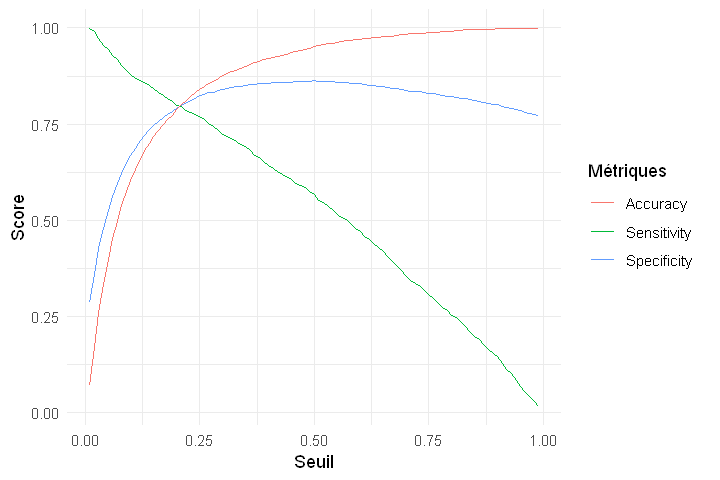

In [64]:
# Graphique montrant les Métriques de log_model pour divers seuils

print_results(log_model)[['Plot']]

**Choix d'un seuil 'optimal'**

La nature croissante du score de classification (*Accuracy*) à mesure que le suil augmente est un résultat très typique en général pour une régression logistique avec des classes déséquilibrées et en particulier pour la modélisation du rique de crédit. Donc si on considérait uniquement le score de classification, on serait tenté de choisir par exemple un seuil de 50%. Mais comme vous le savez, le score de classification n'est pas une métrique adaptée pour évaluer un modèle de classification lorsqu'il y a un déséquilibre important de classes.



En ce qui concerne la sensibilité et la spécificité, nous constatons qu'à mesure que le seuil augmente, la sensibilté diminue et la spécificité augmente. Ceci est aussi valable pour tous les cas de classification par un algorithme d'apprentissage automatique. C'est-à-dire que si vous améliorez la sensibilité, la spécificité est diminuée et vice-versa. Par exemple, pour un seuil de 0.01, nous obtenons une sensibilité d'environ 100% (sa valeur maximale) et une spécificité d'environ 25% (sa valeur minimale). De plus, pour un seuil de 0.99, la sensibilité est d'environ 0% (sa valeur minimale) et la spécifité égale à un peu plus de 75% (sa valeur maximale).



Donc, il y a un compromis à faire entre la sensibilité et la spécificité. Le choix d'un seuil "optimal" est donc d'une importance capitale non seulement parce-qu'il modifie les valeurs des métriques d'évaluation de la performance du modèle mais parce-que ce choix implique directement des conséquences sur les décisions à prendre en ce qui concerne les nouveaux demandeurs de crédit. C'est-à-dire ce seuil permettra de décider si la banque accorde ou pas un prêt à un nouveau demandeur de crédit.



Il est clair qu'aucun modèle n'est parfait et peu importe le choix du seuil, il y aura toujours des débiteurs qui seront en défaut de paiement. Mais un modèle sera toujours mieux qu'une simple devinette pour le choix des prêts que la banque devra accorder. Le modèle est une grande aide à la décision et aide la banque à décider du nombre de prêts qu'elle doit approuver si elle ne veut pas dépasser un certain pourcentage de défauts de paiement dans leur portefeuille de clients.

Je sais que vous êtes tenté de dire que le meilleur seuil est celui du point d'intersection entre la courbe de Sensibilité et celle de Spécificité. C'est possible ! De toute les façons, la banque doit évaluer l'impact de sa décision en ce qui concerne le choix d'un seuil et adapter périodiquement ce choix en focntion des nouvelles données qu'elle aura : Mise à jour du modèle.

**Courbe ROC**



En réalité, dans la pratique, les banques veulent simplement savoir quel est globalement le meilleur modèl sans avoir à faire des hypoythèses sur le seuil. La courbe ROC (*Receiver Operating Characteristic*) est la méthode d'évaluation utilisée pour cela.

La courbe ROC est un graphique qui montre comment les taux de vrais positifs et de faux positifs varient pour un modèle lorsque le seuil est modifié. 

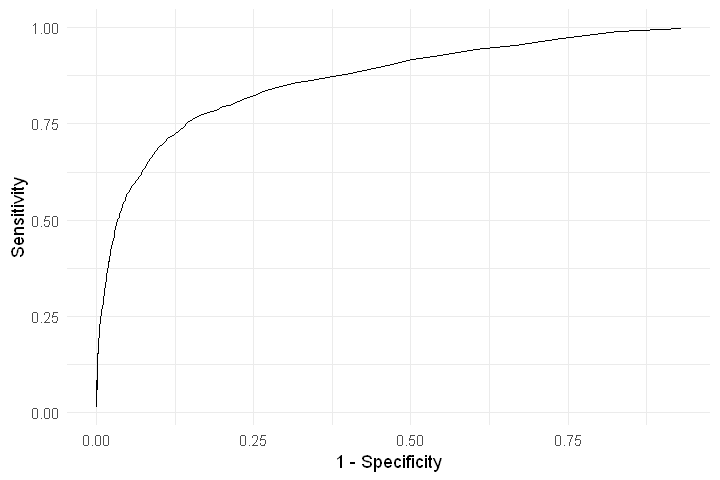

In [65]:
# Courbe ROC de log_model

print_results(log_model)[['ROC Curve']]

La courbe ROC commence toujours dans le coin inférieur gauche où la sensibilité est égale à 0 et la spécificité est égale à 1 ce qui correspond au classement de tous les clients comme étant des cas de non-défaut de paiement. L'autre extrémité de la courbe (coin en haut à droite) correspond à une sensibilité égale à 1 et donc une spécificité de 0.

De manière générale, la zone optimale de la courbe ROC est celle qui est la plus proche du coin supérieur gauche (du cadre du graphique) mieux c'est. Cette zone correspond à des sensibiltés plus élevées associées à des spécificités élevées.

Une mesure que les banques aiment utiliser pour comparer les courbes ROC (et donc comparer plusieurs modèles de classification) est l'AUC (***Area Under the Curve***). Plus cette mesure est élevée, meilleur est le modèle pour prédire une classe négative comme négative et une classe positive comme positive. La valeur varie de 0 à 1.

In [66]:
# AUC vs seuils de log_model

auc_model <- function(model) {
    predictions <- predict(model, newdata = test_set, type = "response")
    return (auc(roc(test_set$loan_status, predictions)))
}

In [67]:
auc_model(log_model)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8705

L'AUC est égal à 0,8705 e qui signifie que ce modèle une probabilité de 87,05% de distinguer correctement une classe négative d'une classe positive. 

L'AUC est utilisé pour comparer des modèles.

## *Stepwise regression model*

En l'absence d'expertise en la matière, la régression logistique par étapes (***stepwise regression model***) peut aider à la recherche des prédicteurs les plus importants. 

La régression pas à pas consiste à construire un modèle de régression étape par étape en évaluant chaque prédicteur afin d'identifier ceux qui apportent de la valeur au modèle final. Il existe deux types d'algorithmes de ***stepwise regression*** :

* **backward stepwise** : cet algorithme commence par un modèle contenant tous les prédicteurs. Il vérifie ensuite ce qui se passe lorsque chacun de prédicteurs est supprimé du modèle. Si la suppression  d'un prédicteur n'a pas d'impact substantiel sur la performance du modèle alors l'algorithme supprime définitivement cette variable. Donc à chaque étape de l'exécution de l'algorithme, le prédicteur qui impacte le moins la performance du modèle est supprimé. Cela se produit jusqu'à ce qu'il reste seulement les prédicteurs importants.

* **forward stepwise** : c'est la même idée de sélection des prédicteurs importants du *backward stepwise* mais dans le sens inverse. Ici, l'algorithme commence par un modèle ne contenant aucun prédicteur et ajoute à chaque étape un prédicteur en examinant l'amélioration qu'apporte ce prédicteur quant à la performance du modèle. Les prédicteurs sont ajoutés étape par étape jusqu'à ce qu'aucun nouveau prédicteur n'apporte une valeur substantielle au modèle.

Il est possible que pour un même ensemble de données d'entraînement, ces deux algorithmes ne donnent pas le même résultat en ce qui concerne les prédicteurs importants.

In [68]:
# Aide sur la fonction step()
#?step

In [69]:
# Sélection automatique des variables (forward stepwise regression)

null_model <- glm(loan_status ~ 1, data = train_set, family = 'binomial')

forward_model <- step(null_model, 
                      scope = list(lower = null_model, upper = log_model), 
                      direction = 'forward', 
                      steps = 2000)

Start:  AIC=26343.41
loan_status ~ 1

                             Df Deviance   AIC
+ loan_grade                  6    22656 22670
+ loan_percent_income         1    22986 22990
+ loan_int_rate               1    23739 23743
+ person_income               1    24510 24514
+ person_home_ownership       3    24826 24834
+ cb_person_default_on_file   1    25594 25598
+ loan_intent                 5    25961 25973
+ loan_amnt                   1    25989 25993
+ person_emp_length           1    26170 26174
+ person_age                  1    26335 26339
+ cb_person_cred_hist_length  1    26339 26343
<none>                             26341 26343

Step:  AIC=22670.12
loan_status ~ loan_grade

                             Df Deviance   AIC
+ loan_percent_income         1    19596 19612
+ person_income               1    20574 20590
+ person_home_ownership       3    21287 21307
+ loan_intent                 5    22248 22272
+ person_emp_length           1    22500 22516
+ loan_amnt           

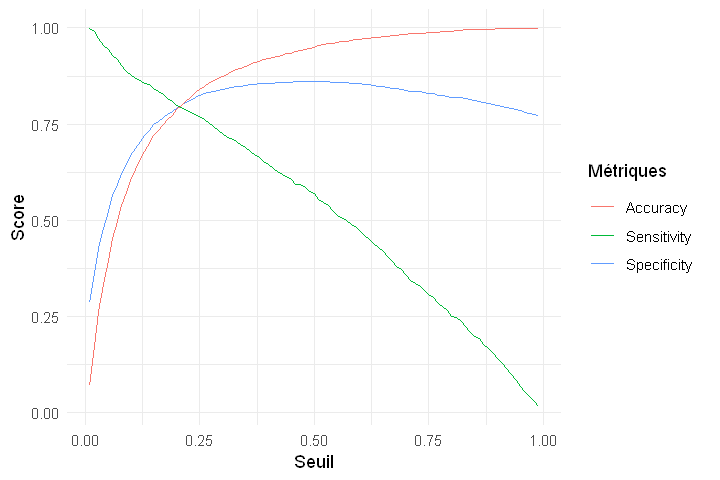

In [70]:
# Graphique montrant les Métriques de forward_model pour divers seuils

print_results(forward_model)[['Plot']]

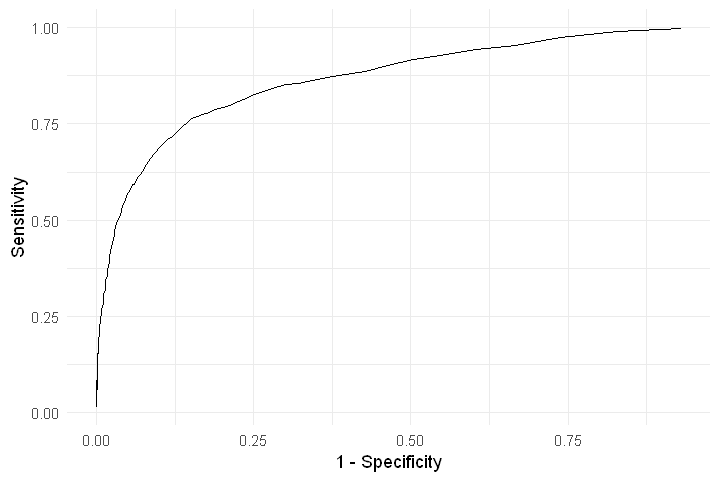

In [71]:
# Courbe ROC de forward_model

print_results(forward_model)[['ROC Curve']]

In [72]:
# AUC de forward_model

auc_model(forward_model)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8705

**Construisons et évaluons un modèle de régression logistique en utilisant les données d'entraînement obtenues par la méthode de sur-échantillonnage de la classe minoritaire :**

In [73]:
# Modèle avec les données d'entraînement sur-échantillonnées

log_model_ros <- log_modeling(train_oversampled_df)

summary(log_model_ros)


Call:
glm(formula = loan_status ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4879  -0.7144  -0.0899   0.6615   2.6101  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -2.100069   0.083093 -25.274  < 2e-16 ***
person_age                 -0.033111   0.332695  -0.100    0.921    
person_income              -1.096342   0.150347  -7.292 3.05e-13 ***
person_home_ownershipOTHER  0.331288   0.225926   1.466    0.143    
person_home_ownershipOWN   -1.604255   0.070491 -22.758  < 2e-16 ***
person_home_ownershipRENT   0.652215   0.030687  21.254  < 2e-16 ***
person_emp_length           0.120094   0.448540   0.268    0.789    
loan_intentEDUCATION       -0.625923   0.044160 -14.174  < 2e-16 ***
loan_intentHOMEIMPROVEMENT  0.340617   0.050029   6.808 9.87e-12 ***
loan_intentMEDICAL         -0.100474   0.043179  -2.327    0.020 *  
loan_intentPERSONAL        -0.389787   

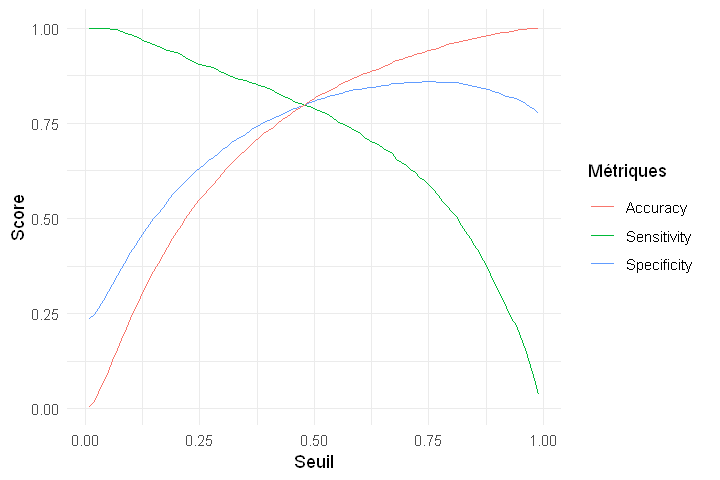

In [74]:
# Métriques de log_model_ros pour divers seuils

print_results(log_model_ros)[['Plot']]

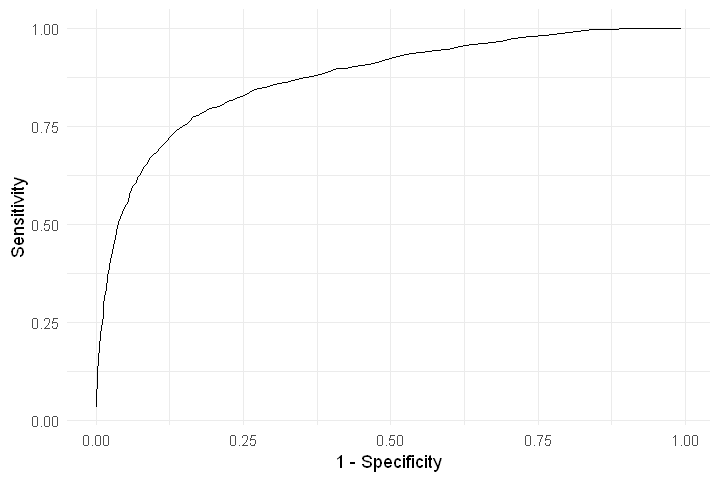

In [75]:
# Courbe ROC de log_model_ros

print_results(log_model_ros)[['ROC Curve']]

In [76]:
# AUC de log_model_ros

auc_model(log_model_ros)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8729

**Construisons et évaluons un modèle de régression logistique en utilisant les données d'entraînement obtenues par la méthode de sous-échantillonnage de la classe majoritaire :**

In [77]:
# Modèle avec les données d'entraînement sous-échantillonnées

log_model_rus <- log_modeling(train_undersampled_df)

summary(log_model_rus)


Call:
glm(formula = loan_status ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4293  -0.7131   0.0003   0.6596   2.6410  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -2.19592    0.15425 -14.236  < 2e-16 ***
person_age                  -0.02179    0.63310  -0.034 0.972548    
person_income               -1.02415    0.27815  -3.682 0.000231 ***
person_home_ownershipOTHER   0.44654    0.43991   1.015 0.310067    
person_home_ownershipOWN    -1.62168    0.13146 -12.336  < 2e-16 ***
person_home_ownershipRENT    0.67790    0.05762  11.765  < 2e-16 ***
person_emp_length            0.52221    0.84298   0.619 0.535598    
loan_intentEDUCATION        -0.58248    0.08317  -7.004 2.50e-12 ***
loan_intentHOMEIMPROVEMENT   0.23918    0.09340   2.561 0.010445 *  
loan_intentMEDICAL          -0.07546    0.08094  -0.932 0.351177    
loan_intentPERSONAL         -0.45033   

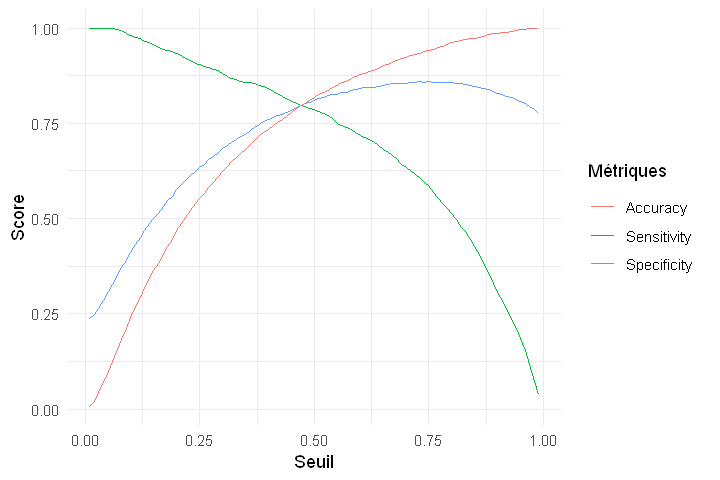

In [78]:
# Métriques de log_model_rus pour divers seuils

print_results(log_model_rus)[['Plot']]

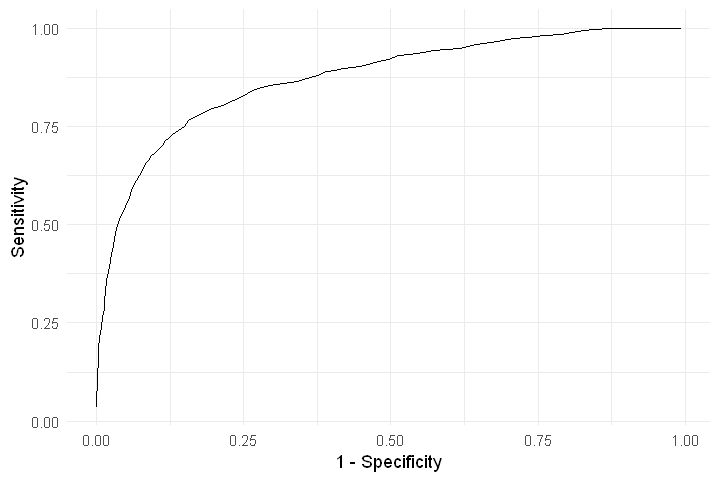

In [79]:
# Courbe ROC de log_model_rus

print_results(log_model_rus)[['ROC Curve']]

In [80]:
# AUC de log_model_rus

auc_model(log_model_rus)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8727

**Construisons et évaluons un modèle de régression logistique en utilisant les données d'entraînement obtenues par combinaison de la méthode de sur-échantillonnage de la classe ninoritaire et de la méthode de sous-échantillonnage de la classe majoritaire :**

In [81]:
# # Modèle avec les données d'entraînement obtenues par combinaison du sur-échantillonnage et du sous-échantillonnage

log_model_ros_rus <- log_modeling(train_ros_rus_df)

summary(log_model_ros_rus)


Call:
glm(formula = loan_status ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.4346  -0.6838  -0.1128   0.6393   2.6858  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -2.11989    0.15244 -13.906  < 2e-16 ***
person_age                   0.36016    0.61417   0.586  0.55759    
person_income               -1.55389    0.27908  -5.568 2.58e-08 ***
person_home_ownershipOTHER   0.21474    0.40772   0.527  0.59841    
person_home_ownershipOWN    -1.52338    0.12644 -12.048  < 2e-16 ***
person_home_ownershipRENT    0.76038    0.05639  13.485  < 2e-16 ***
person_emp_length            0.16424    0.81244   0.202  0.83980    
loan_intentEDUCATION        -0.73635    0.08142  -9.044  < 2e-16 ***
loan_intentHOMEIMPROVEMENT   0.32030    0.09217   3.475  0.00051 ***
loan_intentMEDICAL          -0.17932    0.07885  -2.274  0.02295 *  
loan_intentPERSONAL         -0.46578   

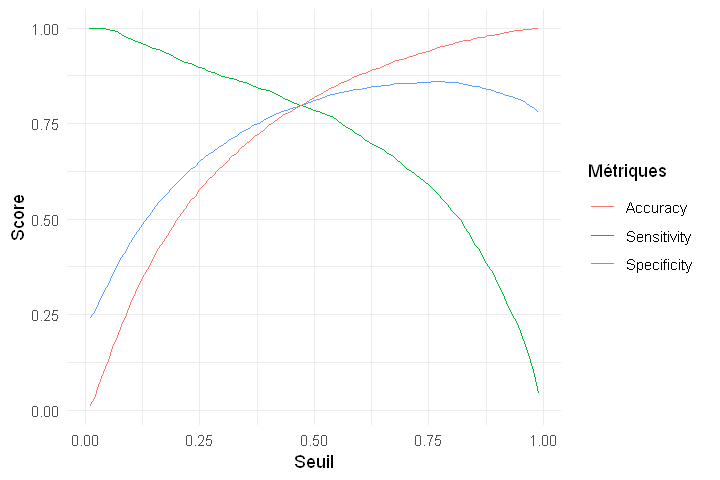

In [82]:
# Métriques de log_model_ros_rus pour divers seuils

print_results(log_model_ros_rus)[['Plot']]

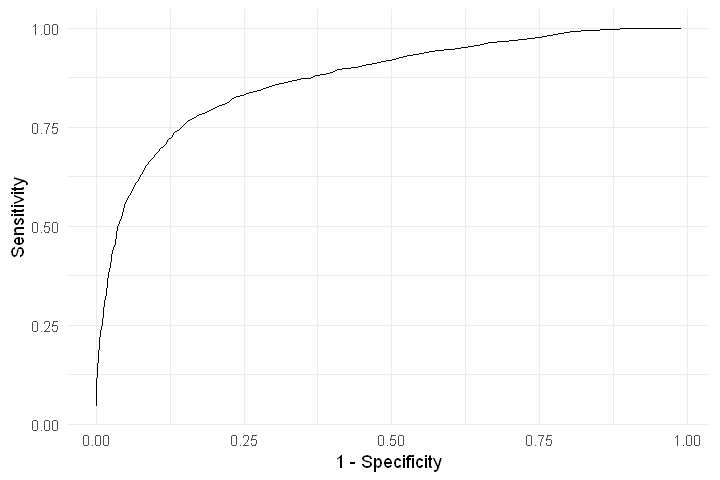

In [83]:
# Courbe ROC de log_model_ros_rus

print_results(log_model_ros_rus)[['ROC Curve']]

In [84]:
# AUC de log_model_ros_rus

auc_model(log_model_ros_rus)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8726

In [86]:
# Sauvegarde du meilleur modèle

saveRDS(log_model_ros, "credit_scoring_final_model.rds")

# <font color=green> Conclusion

FELICITATIONS pour avoir suivi cette formation jusqu'à la fin. Vous êtes à maintenant capables :

* **d'analyser, de nettoyer et de préparer les données pour modéliser la probabilité de défaut de paiement** ; 

* **d'analyser la performance des différents modèles construits et de déterminer et de déterminer le seuil optimal pour la prédiction des résultats de la variable cible** ;

* **de comparer plusieurs modèles en utilisant une métrique comme l'AUC** ;

* **de bien structurer votre code R en créant des fonctions qui rendent votre flux de travail beaucoup plus clair et digeste**. 

Ces compétences vous aideront dans d'autres tâches de mdoélisation par des algorithmes de Machine Learning. 

La modélisation du risque de crédit par les méthodes d'apprentissage automatique est un domaine passionnant et il reste encore beaucoup de choses à apprendre. C'est pour cela, vous ne devez pas vous arrêter en si bon chemin

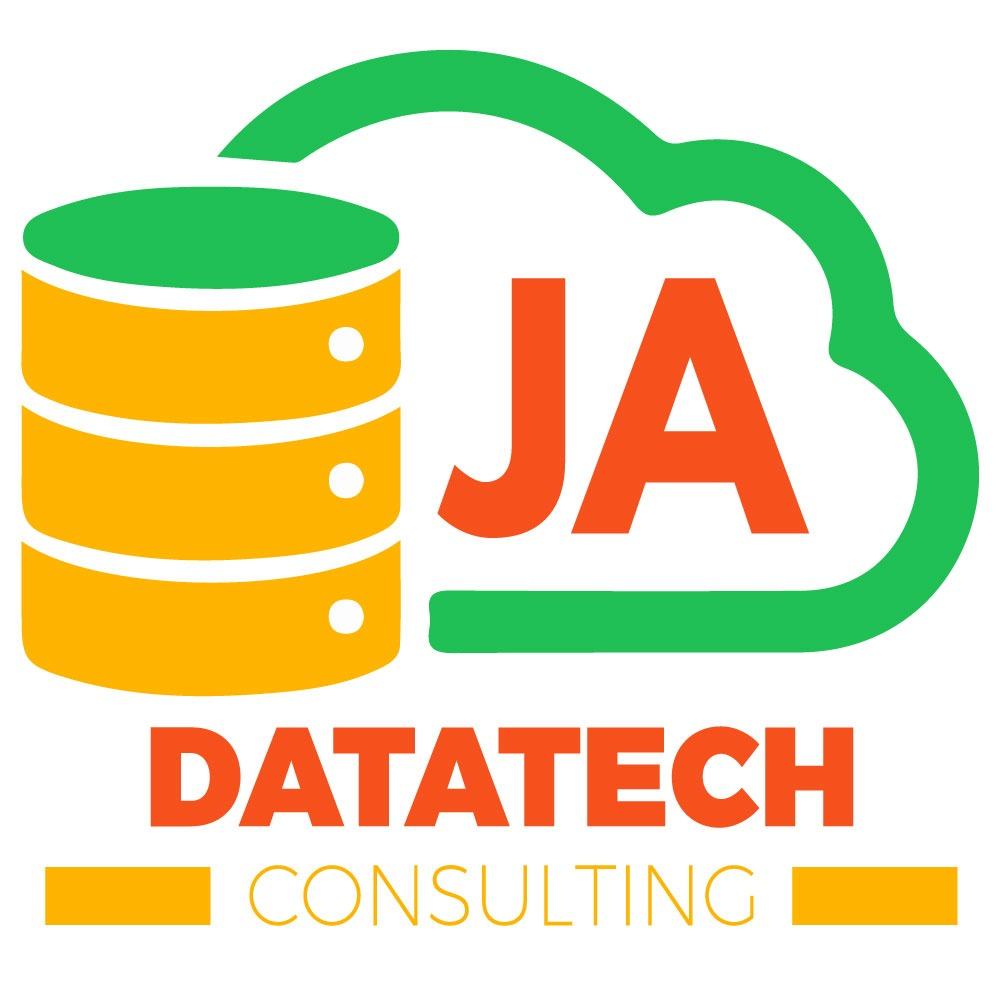